<img src="https://static.voices.com/wp-content/uploads/History-of-Audiobooks.jpg" width="700" height="400">

 # Programming for Data Analysis Project
## 1. Introduction and Project Overview
***
### Objectives of the Project:

For this project you must create a data set by simulating a real-world phenomenon of your choosing. You may pick any phenomenon you wish – you might pick one that is of interest to you in your personal or professional life. Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python. We suggest you use the numpy.random package for this purpose.
Specifically, in this project you should:
- Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
- Investigate the types of variables involved, their likely distributions, and their relationships with each other.
- Synthesise/simulate a data set as closely matching their properties as possible.
- Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

For this project I've decided to research the statistics for audiobooks services which becoming more popular every year. As a person who loves both audiobooks and statistics, I was curious to find out things like, who listens to audiobooks, how many books does the average audiobook listener go through in a year, and how many new audiobooks are published. 

I'll pick a selection of relevant variables, examine their properties, potential data types, and how they relate to each other. I'll then try and work out code to simulate a random dataset based on that information.

First of all I decided to look at my personal statistics which is readily available for my from my audible app. I’ve been a member since April 2016 and in total for that period (till July 2022) I’ve listened for the audiobooks for 2 months 14 days 15 hours and 16 minutes = 108 734.128 minutes, well done me! Looking back at last 5 months, March and April have the highest listening time, both at about 34 hours. On average my listening time will be around 30 hours a month. Now, it will be interesting to find out how do I compare to the average listener :)

## 2. Research and interesting facts
***
Digital audiobooks continue to be the fastest growing segment in publishing.  Not only is the entire publishing industry making more money, but there is more choice available for customers. In 2019 audiobook sales increased by 16% in the United States and generated over 1.2 billion dollars in revenue, whereas in 2018 it only made 940 million, an increase of 25% from 2017. (https://goodereader.com/blog/audiobooks/audiobook-trends-and-statistics-for-2020)

Edison Research national survey of American audiobook listeners ages 18 and up found that the average number of audiobooks listened to per year increased to 8.1 in 2020, up from 6.8 in 2019.
The most popular audiobook genre continues to be Mysteries/Thrillers/Suspense. 57% of frequent audiobook listeners are under the age of 45; this is up from 51% in 2019. (https://www.audiopub.org/uploads/pdf/2020-Consumer-Survey-and-2019-Sales-Survey-Press-Release-FINAL.pdf)

How are people in the US listening to audiobooks? Smart speakers are becoming increasingly popular from products such as Amazon Echo, Google Home or Apple HomePod. In a recent poll from the American Audiobook Publishers Association found that 60% of respondents own a smart speaker, and 46% of smart speaker owners have used it to listen to an audiobook, which is up 31% from 2018.  Although the automobile is still the number one place where people listen to audiobooks, the home is where audiobooks are played for longer durations. (https://goodereader.com/blog/audiobooks/audiobook-trends-and-statistics-for-2020)

Women (between 30 and 49 years old) recently overtook men as a most active audiobook listeners. Audiobooks aren’t particularly popular with people 65 years and older. This group still prefers eBooks and print books.
Given the number of audiobooks people listen to and their high price compared to ebooks and even print books, it isn’t surprising that average audiobook listener comes from a higher-income household. In a 2019 survey, 30% of participants with a 75k yearly income said they had listened to at least one audiobook in the previous year. (https://www.statista.com/statistics/299808/audiobook-listening-population-in-the-us-by-household-income/) 


## Generating data
***
We begin by importing the necessary python packages.

In [1]:
# numerical arrays
import numpy as np

# dataframes
import pandas as pd

# plotting
import matplotlib.pyplot as plt

# nicer plotting
import seaborn as sns

# module for choosing from a list
from secrets import choice

# Regular expressions
import re 
import string

# python standard random library
import random

# Importing Numpy random generator and assigning it to rng variable
from numpy.random import default_rng

# Seed value 123 is set for reproduceable random data
rng = default_rng(seed=123)


# set global style for seaborn plots
sns.set_style("darkgrid")

### User ID
I decided that we do not need to know the names of our audiobook service members as it will not add any value into analysis. So instead, we going to distinguish them by their user ID. To generate random user ID, we going to choose 3 random letters and add two random digits to it. We going to add 100 users to our database.

In [2]:
# Setting user id list for user IDs to be stored
uid=[]

# Setting random seed for Python Random method
random.seed(123)

# A for loop for random 3 letter and random 2 digits to be generated as user IDs
for i in range(100):
    uid.append(''.join(random.choices(string.ascii_uppercase,k=3)) + ''.join(random.choices(string.digits,k=2)))

# Creating df data frame with numbered 100 users
df= pd.DataFrame({'N': np.arange(100)})

# Adding generated user IDs to df2
df['uid'] = uid

df.head(10)  

,N,uid
0,0,BCK19
1,1,ANI81
2,2,IIG04
3,3,CPB34
4,4,XCD70
5,5,XOG87
6,6,IUF65
7,7,VIK75
8,8,RQR84
9,9,RJA71


### Adding gender

Now we are going to randomly assign gender to our members. As we do not care whether there will be more men or women in our databse we do not need to specify probablity. 

In [3]:
genders = ['male', 'female']

# Random selection of gender for 100 users
gender = rng.choice(genders, size=100)
df['gender'] = gender.tolist()
df.head(10)  

,N,uid,gender
0,0,BCK19,male
1,1,ANI81,female
2,2,IIG04,female
3,3,CPB34,male
4,4,XCD70,female
5,5,XOG87,male
6,6,IUF65,male
7,7,VIK75,male
8,8,RQR84,male
9,9,RJA71,male


In [4]:
# We can quickly find out how many males and females are in our database
df['gender'].value_counts()

male      55
female    45
Name: gender, dtype: int64

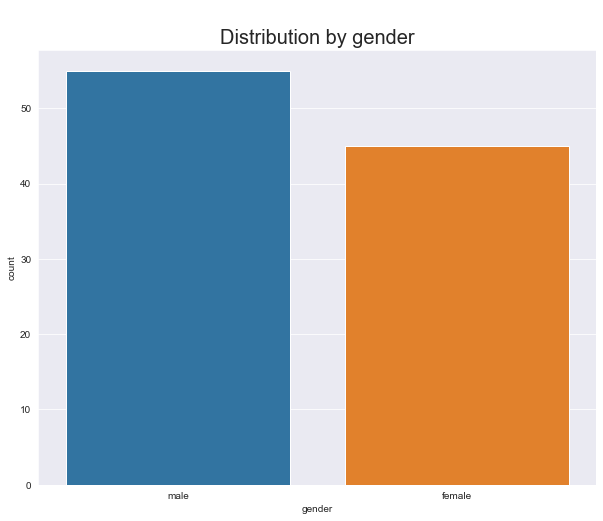

In [5]:
# set figure size
plt.rcParams["figure.figsize"] = (10,8)
sns.countplot(x= 'gender', data=df)
# set title
plt.title("\nDistribution by gender", size=20);

### Age groups

I thought about putting an actual age here, but it would be completely random and it would be much trikier to specify the probability of every year of age. So I decided to break it into age brackets, similar to what other people have done for this kind of analysis. There will be 4 age groups: '18-29', '30-49', '50-64', '65+'. The breakdown is going to be skewed towards left 2 ranges. Data type will be string.

According to Pew Research study, where they gathered data related to age groups and the percentage of various age groups who had consumed an audiobook in the year leading up to February, 2021. From the data provided you can see that approximately 30% of those ages 18-29 had listened to an audiobook in the year leading up to February 2021.
(https://www.pewresearch.org/fact-tank/2022/01/06/three-in-ten-americans-now-read-e-books/) So I've tried to have similar distribustion in my data.

In [6]:
# create the age_group variable
age_group = ['18-29', '30-49', '50-64', '65+']

# create new list and specifying probability
age = rng.choice(age_group, p=[0.34, 0.3, 0.24, 0.12], size=100)
df['age_group'] = age.tolist()
df.head(10) 

,N,uid,gender,age_group
0,0,BCK19,male,18-29
1,1,ANI81,female,18-29
2,2,IIG04,female,18-29
3,3,CPB34,male,30-49
4,4,XCD70,female,30-49
5,5,XOG87,male,30-49
6,6,IUF65,male,50-64
7,7,VIK75,male,30-49
8,8,RQR84,male,18-29
9,9,RJA71,male,50-64


In [7]:
# Now lets see the distribution by the age groups. 
df['age_group'].value_counts()

18-29    39
30-49    31
50-64    21
65+       9
Name: age_group, dtype: int64

We can quickly plot it on th pie chart to visualize it.

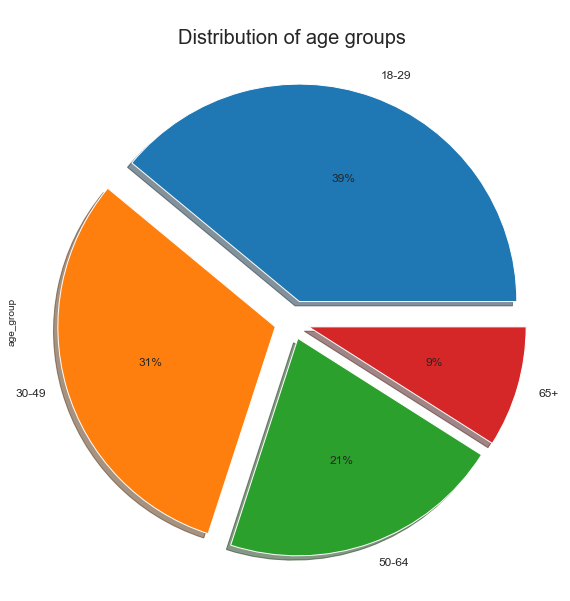

In [8]:
# create a variable for value counts
age_gr=df['age_group'].value_counts()

# set figure size
plt.rcParams["figure.figsize"] = (15,10)

explode = (0.1, 0.08, 0.08, 0.08)
# create pie chart with various parameters
ax = age_gr.plot(kind='pie', autopct='%1.0f%%', shadow=True, explode= explode, textprops={'fontsize': 12})

# set title
ax.set_title("\nDistribution of age groups", size=20);

### Genres
https://forcreators.com/popular-audiobook-categories-2021/
https://www.audiopub.org/uploads/pdf/Consumer-and-Sales-Survey-Press-Release-2021-FINAL.pdf

In [9]:
# Selecting most popular audiobook genres.
genre = ['Mysteries/Thrillers', 'Sci-Fi & Fantasy', 'Non-fiction', 'Romance', 'Children', 'Business', 'Podcasts', 
        'History', 'Comedy']
# Setting probability for each category
probability = [0.22, 0.18, 0.07, 0.15, 0.02, 0.09, 0.12, 0.04, 0.11]


I think one of the most interesting variables in our dataset will be how many books our members listen per month. So lets begin with generating monthly periods by using period_range() pandas function (https://pandas.pydata.org/docs/reference/api/pandas.period_range.html)
The part on how to combine two data frames with different lengths so that for each month we have each of the members repeating (as we want to know how many books they read each month)took me a lot of time and testing to figure out. In the end stackoverflow was my saviour as it is most of the time and I was able to find information on how to do a cross join of two data frames with no columns in common using pandas.
(https://stackoverflow.com/questions/35265613/pandas-cross-join-no-columns-in-common)

In [15]:
# Let's look at the statistics over 3 year period for each month
periods = 12*3

month = pd.period_range(start='1/1/2018', periods=periods, freq='M')
dfmonth = pd.DataFrame()
dfmonth['date'] = month

# Creating temporary column that both our data frames will have so we can merge them together
df['tmp'] = 1
dfmonth['tmp'] = 1
full = pd.merge(dfmonth, df, on=['tmp'])
# After merge is complete we can delete it
full = full.drop('tmp', axis=1)
full


,date,N,uid,gender,age_group
0,2018-01,0,BCK19,male,18-29
1,2018-01,1,ANI81,female,18-29
2,2018-01,2,IIG04,female,18-29
3,2018-01,3,CPB34,male,30-49
4,2018-01,4,XCD70,female,30-49
...,...,...,...,...,...
3595,2020-12,95,LMK88,male,50-64
3596,2020-12,96,ERO80,male,65+
3597,2020-12,97,PEO84,male,30-49
3598,2020-12,98,NJY80,female,18-29


In [16]:
# Saving our data to file. For now it will be re-written every time we run the code. I do this for my own check.
full.to_csv('data/comb.csv')

And now to the interesting part. For this example, we presume all of our 100 members have been members of our audiobook service for at least 3 years 2018-2020. Now we want to find out how active they were during this time listening to the books. I specifically wanted to include year 2020 as during pandemic there have been a significant increase in the listening time which we are going to account for when generating the data.

Acoording to https://www.greatworklife.com/how-to-listen-to-audiobooks-statistics/ 32% of people listen to 2-3 books and 29% digested 4 to 7 books per month. This means that 61% of audiobook listeners are huge fans of the service.

So let's try to simulate similar data and account for increase in 2020.

In [17]:
nbooks_arr = ['0', '1', '2-3','4-6', '7+']
nbooks2018 = rng.choice(nbooks_arr, 1200, p=[0.09, 0.24, 0.28, 0.25, 0.14])
nbooks2019 = rng.choice(nbooks_arr, 1200, p=[0.05, 0.22, 0.32, 0.30, 0.11])
nbooks20220 = rng.choice(nbooks_arr, 1200, p=[0.02, 0.17, 0.32, 0.29, 0.2])
#nbooks = nbooks.astype(int)


In [37]:
# splitting into separate years for testing
year2018 = full.loc[full['date'] < '2019-01']
year2019 = full.loc[(full['date'] >= '2019-01') & (full['date'] < '2020-01')]
year2020 = full.loc[full['date'] >= '2020-01']
year2018

,date,N,uid,gender,age_group
0,2018-01,0,BCK19,male,18-29
1,2018-01,1,ANI81,female,18-29
2,2018-01,2,IIG04,female,18-29
3,2018-01,3,CPB34,male,30-49
4,2018-01,4,XCD70,female,30-49
...,...,...,...,...,...
1195,2018-12,95,LMK88,male,50-64
1196,2018-12,96,ERO80,male,65+
1197,2018-12,97,PEO84,male,30-49
1198,2018-12,98,NJY80,female,18-29


In [39]:
full.loc[full['date'] < '2019-01', 'num_books'] = nbooks2018

In [41]:
full.head(30)

,date,N,uid,gender,age_group,num_books
0,2018-01,0,BCK19,male,18-29,1
1,2018-01,1,ANI81,female,18-29,0
2,2018-01,2,IIG04,female,18-29,2-3
3,2018-01,3,CPB34,male,30-49,4-6
4,2018-01,4,XCD70,female,30-49,0
5,2018-01,5,XOG87,male,30-49,2-3
6,2018-01,6,IUF65,male,50-64,2-3
7,2018-01,7,VIK75,male,30-49,2-3
8,2018-01,8,RQR84,male,18-29,0
9,2018-01,9,RJA71,male,50-64,2-3
